# WEEK 07 - OO Programming I

## Learning objectives

- Getting started with object-oriented programming
- Consolidating procedural programming concepts and employing them in the context of object-oriented design
- Learning about object-oriented concepts such as encapsulation, abstraction, inheritance, polymorphism, etc.
- Learning about good practices and pitfalls in object-oriented design
- Understanding and implementing basic concepts from complex analysis

## Overview

In the following set of tutorials, we are going to embark on a journey that will take us from complex analysis to sparse matrices and graph theory, and through which you will hopefully consolidate the concepts from procedural programming and employ them in a new and exciting way that is object-oriented programming. In particular, we are going to see how the idea of objected-oriented programming is useful for the implementation of various scientific concepts, and will learn about good practices and pitfalls of object-oriented design and concepts such as encapsulation, abstraction, inheritance and polymorphism.

## Complex analysis

We are going to start by implementing an object-oriented representation of complex numbers. Complex numbers $\mathbb{C}$ extend the real numbers $\mathbb{R}$ with $i$, called the imaginary unit and satisfying $i^{2} = -1$. Every complex number $z \in \mathbb{C}$ can be represented as $z = \alpha + \beta i$, where $\alpha, \beta \in \mathbb{R}$. $\alpha$ is referred to as the *real* part and $\beta$ as the *imaginary* part. Note that all real numbers can be represented as a complex number whose imaginary part is zero.

Since complex numbers consist of two parts, it is often useful to visualize them on the 2D plain, with the $x$ axis typically representing the real part and the $y$ axis representing the imaginary part.

For example, the complex number $z = 2 + i$ can be visualized as follows:

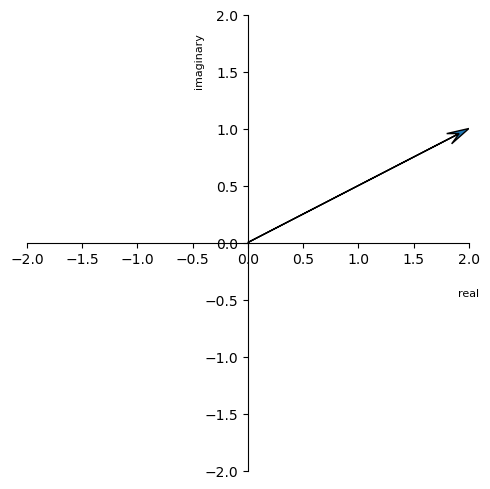

In [1]:
import matplotlib.pyplot as plt
# Abstraction --> the user does not how to implement the 
# Encapsulation --> not letting the user stating the state of the implement,you will give the user 
# official way to do it, have to go to proper channel on how to change it.
fig, ax = plt.subplots(figsize=(5,5))
ax.arrow(0, 0, 2., 1., head_width=0.1, head_length=0.2, overhang = 0.5, length_includes_head=True)
ax.spines.left.set_position('zero')
ax.spines.right.set_color('none')
ax.spines.bottom.set_position('zero')
ax.spines.top.set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel(r"real", fontsize = 8)
ax.set_ylabel(r"imaginary", fontsize = 8)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.xaxis.set_label_coords(1, 0.4)
ax.yaxis.set_label_coords(0.4, 0.9)
plt.tight_layout()

Complex numbers have numerous applications in various scientific problems, from algebra to quantum mechanics. Furthermore, it is sometimes greatly simpler to represent certain problems in complex notation.

### Basic operations

Complex numbers can be added together and subtracted from each other by simply adding and subtracting their real and imaginary parts separately as follows:

Let $x = \alpha_{1} + \beta_{1}i$ and $y = \alpha_{2} + \beta_{2}i$

\begin{equation}
z = x + y := (\alpha_{1} + \alpha_{2}) + (\beta_{1} + \beta_{2})i,
\end{equation}

\begin{equation}
z = x - y := (\alpha_{1} - \alpha_{2}) + (\beta_{1} - \beta_{2})i.
\end{equation}

The multiplication operator can then be defined as

\begin{equation}
z = x * y := (\alpha_{1} + \beta_{1}i) . (\alpha_{2} + \beta_{2}i) = \alpha_{1} \alpha_{2} + \alpha_{1} \beta_{2}i + \beta_{1} \alpha_{2}i + \beta_{1} \beta_{2} i^{2} = (\alpha_{1} \alpha_{2} - \beta_{1} \beta_{2}) + (\alpha_{1} \beta_{2} + \beta_{1} \alpha_{2})i.
\end{equation}

Note that complex multiplication corresponds to a scaling and rotation operation geometrically, which I personally find beautiful. It is furthermore the reason behind why Euler's formula $e^{ix} = cos(x) + sin(x)i$ holds, why multiplication by a point on the unit circle is pure rotation and why $e^{ix}$ corresponds to rotation around the unit circle about the origin!

Moreover, we are going to define the conjugate of $z = \alpha + \beta i$ as $\bar{z} = \alpha - \beta i$, which geometrically corresponds to reflection about the real axis as illustrated below:

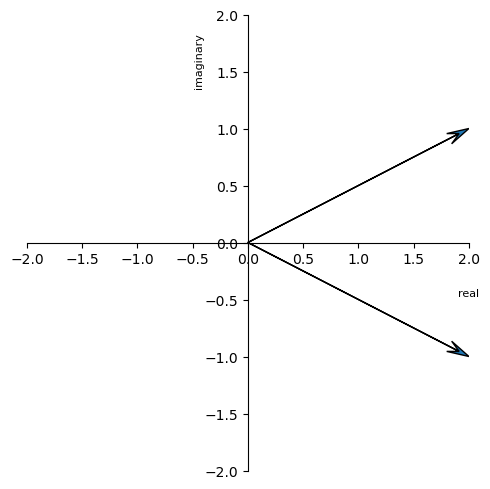

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
ax.arrow(0, 0, 2., 1., head_width=0.1, head_length=0.2, overhang = 0.5, length_includes_head=True)
ax.arrow(0, 0, 2., -1., head_width=0.1, head_length=0.2, overhang = 0.5, length_includes_head=True)
ax.spines.left.set_position('zero')
ax.spines.right.set_color('none')
ax.spines.bottom.set_position('zero')
ax.spines.top.set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel(r"real", fontsize = 8)
ax.set_ylabel(r"imaginary", fontsize = 8)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.xaxis.set_label_coords(1, 0.4)
ax.yaxis.set_label_coords(0.4, 0.9)
plt.tight_layout()

Finally, the absolute value of $z = \alpha + \beta i$ is defined as the non-negative number

\begin{equation}
|z| := \sqrt{z.\bar{z}} = \sqrt{\alpha^{2} + \beta^{2}},
\end{equation}

which corresponds to the magnitude of the vector representing $z$ on the complex plain.

Now that you are hopefully motivated to a sufficient degree and know how the basic operators work, let us get on with our task of representing complex numbers in Python. In particular, we would like to define the notion of complex numbers as well as the basic operators above in Python such that complex computations become possible. Our design should fulfill the following criteria:

- The implementation should define complex numbers and support the following operators: summation, subtraction, multiplication, conjugation, computing the absolute value, visualization on the complex plain
- It should be easy to reuse and combine these operators, e.g., adding two complex numbers should be as convenient as adding three or adding two complex number and then multiplying it with a third.
- It should be possible to integrate the complex numbers in other applications, i.e., other programs should be able to use complex numbers

Before continuing, think about how you would design your implementation with the requirements above in mind, especially thinking broadly, what programming paradigm is most suitable for the given task?

If you have given enough contemplation to this question, read on.

Although the implementation of complex numbers with support for all the required operations is possible purely through procedural programming, the given criteria and the task of representing complex numbers as new entities in a program lends itself extremely well to the concepts of object-oriented design; therefore, we are going to implement complex numbers as a **class** in the following, in which the necessary data and functionalities will be realized through **member variables** and **member functions**.

The main structure of the class as well as some hints regarding its implementation is given in the following for your convenience. It is your job to complete the implementation and run a few tests to verify it.

In [3]:
"""
Your task is to implement the Complex class.
""";

import math
import matplotlib.pyplot as plt

class Complex:
    # Constructor
    # Initializes the complex number to given real and imaginary parts
    # Default values are zero for both the real and imaginary parts
    def __init__(self,r = 0., i = 0.):
        # Initialize complex number
        self.r = r
        self.i = i

    # String conversion
    # Convert the complex number to string
    def __str__(self):
        return f"{self.r} + {self.i}i"

    # Addition
    # Returns the sum of two complex numbers
    def __add__(self, other):
        # Perform addition
        return Complex(
            self.r + other.r, # real part
            self.i + other.i) # imaginary part

    # Subtraction
    # Subtracts a given complex number from the current object and
    # returns the result
    def __sub__(self, other):
        # Perform subtraction
        return Complex(
            self.r - other.r, # real part
            self.i - other.i) # imaginary part

    # Multiplication
    # Multiplies two complex numbers and returns the result
    def __mul__(self, other):
        # Perform multiplication
        return Complex(
            self.r * other.r - self.i * other.i, # real part
            self.r * other.i + self.i * other.r) # imaginary part

    # Conjugation
    # Compute the conjugate of the complex number
    def conjugate(self):
        # Perform conjugation
        return Complex(
            self.r, # real part
            -self.i) # imaginary part

    # Absolute value
    # Computes and returns the absolute value of the
    # complex number
    def abs(self):
        # Compute absolute value
        return math.sqrt(self.r**2 + self.i**2)

    # Compute phase
    # Computes the phase of the complex number
    # Note that the phase is given as the positive angle, moving
    # counterclockwise from the x-axis to the complex number
    def phase(self):
        angle = math.atan2(self.i, self.r)
        if (angle < 0):
            return angle + 2 * math.pi
        return angle

    # Normalize
    # Normalizes the complex number.
    # Warning! The complex number is modified. This operation is irreversible.
    def normalize(self):
        # Compute the absolute value squared
        abs_val = self.abs()
        # Normalize complex number
        self.r /= abs_val
        self.i /= abs_val

    # Rotate
    # Rotates the complex number by a given phase
    # Warning! This operation modifies the complex number
    # The phase is given in radians
    def rotate(self, phase):
        # Define the rotation complex number which corresponds
        # to the point on the unit circle about the origin, 'phase' away
        # from the positive x axis
        rotation = Complex(math.cos(phase), math.sin(phase))
        # Apply rotation
        res = self * rotation
        self.r = res.r
        self.i = res.i

    # Visualize
    # Visualized the complex number
    def visualize(self):
        fig, ax = plt.subplots(figsize=(3,3))
        min_dim = min(self.r, self.i)
        # ax.arrow(0, 0, self.r, self.i, head_width = 0.1 * min_dim, head_length=0.15 * min_dim,
        #          overhang = 0.1 * min_dim, length_includes_head=True)
        ax.arrow(0, 0, self.r, self.i, length_includes_head=True)
        ax.spines.left.set_position('zero')
        ax.spines.right.set_color('none')
        ax.spines.bottom.set_position('zero')
        ax.spines.top.set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_xlabel(r"real", fontsize = 8)
        ax.set_ylabel(r"imaginary", fontsize = 8)
        if (math.fabs(self.r) > 1e-5):
            ax.set_xlim(-self.r * 1.5, self.r * 1.5)
        if (math.fabs(self.i) > 1e-5):
            ax.set_ylim(-self.i * 1.5, self.i * 1.5)
        ax.xaxis.set_label_coords(1, 0.4)
        ax.yaxis.set_label_coords(0.4, 0.9)
        plt.tight_layout()

Now, we are going to run some basic tests in order to verify your implementation. Run the following cell which performs a few basic operations and controls the answer from your code against the ground truth.

z = 1.0 + 2.0i
Tests completed successfully!


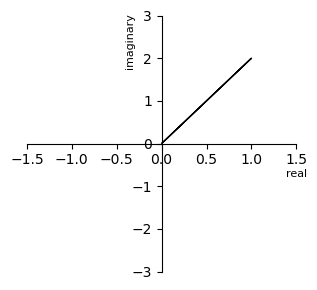

In [4]:
import random

def test_add(x, y):
    z = x + y
    if (math.fabs(z.r - (x.r + y.r)) > 1e-5 or math.fabs(z.i - (x.i + y.i)) > 1e-5):
        raise RuntimeError("Addition failed!")

def test_sub(x, y):
    z = x - y
    if (math.fabs(z.r - (x.r - y.r)) > 1e-5 or math.fabs(z.i - (x.i - y.i)) > 1e-5):
        raise RuntimeError("Subtraction failed!")

def test_mult(x, y):
    z = x * y
    if (math.fabs(z.r - (x.r * y.r - x.i * y.i)) > 1e-5 or math.fabs(z.i - (x.r * y.i + x.i * y.r)) > 1e-5):
        raise RuntimeError("Multiplication failed!")

def test_conjugate(x):
    x_bar = x.conjugate()
    if (math.fabs(x.r - x_bar.r) > 1e-5 or math.fabs(x.i + x_bar.i) > 1e-5):
        raise RuntimeError("Conjugation failed!")

def test_abs(x):
    x_abs = x.abs()
    if (math.fabs(x_abs - math.sqrt(x.r**2 + x.i**2)) > 1e-5):
        raise RuntimeError("Computation of absolute value failed!")

def test_phase(x):
    phase = x.phase()
    if (math.fabs(phase - math.atan(x.i / x.r)) > 1e-5):
        raise RuntimeError("Computation of phase failed!")

def test_normalize(x):
    x.normalize()
    if (math.fabs(x.abs() - 1.) > 1e-5):
        raise RuntimeError("Normalization failed!")

def test_rotate(x, rotation_phase):
    phase_before = x.phase()
    x.rotate(rotation_phase)
    if (math.fabs((x.phase() - ((phase_before + rotation_phase) % (2 * math.pi)))) > 1e-5):
        raise RuntimeError("Rotation failed!")

z = Complex(1., 2.)
print(f"z = {z}")
z.visualize()

n_tests = 100
for _ in range(0, n_tests):
    x = Complex(random.random(), random.random())
    y = Complex(random.random(), random.random())
    test_add(x, y)
    test_sub(x, y)
    test_mult(x, y)
    test_conjugate(x)
    test_abs(x)
    test_phase(x)
    test_normalize(x)
    rotation_phase = random.random() * 10
    test_rotate(x, rotation_phase)

print("Tests completed successfully!")

You may not have been surprised at the answer regarding the appropriate programming paradigm for the task, given that it is the topic of this tutorial; nevertheless, try to convince yourself that it is the case. I find it a very useful mental exercise to contrast a potential implementation of the same task using procedural programming with its object-oriented counterpart. In particular, compare them through the lens of the following questions:

- How would a complex number be represented, i.e., created, handled, manipulated, etc. in each paradigm?
- How about multiple complex numbers?
- Given a number of desired operations such as addition, multiplication, etc. on a number of complex numbers, which implementation would provide a more straightforward experience?
- Which implementation would be easier to extend with further functionalities in the future?
- Given that some third-party code expresses interest in using your complex number implementation, which paradigm would provide a more self-contained and facile interface?

## Homework

The phase $\varphi$ of $z \in \mathbb{C}$ is the angle between the radius formed by $z$ on the complex plain and the positive $x$ (real) axis in radians.

Furthermore, as discussed, complex number multiplication geometrically corresponds to rotation and scaling on the complex plain, with multiplication by points on the unit circle about the origin corresponding to pure rotation.

In the class `Complex`, implement the following:

- a member function named `phase` that computes and returns the phase of the complex number. Note that the phase should be computed as the positive angle moving from the x axis counterclockwise to the complex number. **Hint**: Look at [atan2](https://docs.python.org/3/library/math.html#math.atan2) from the math library
- a member function named `normalize` that normalizes the complex number. Note that the complex number object is modified!
- a member function named `rotate` that receives the rotation phase and rotates the complex number with that phase. **Hint**: Implement the function using multiplication

# WEEK 08 - OO Programming II

## Learning objectives

- Consolidating object-oriented programming design concepts
- Getting started with abstraction, encapsulation, inheritance and polymorphism
- Consolidating procedural programming concepts and employing them in the context of object-oriented design
- Getting familiar with sparse matrix formats and their importance
- Understanding the repercussions of different design choices throughout the development of a real-world example

## Sparse matrices

You are all familiar with matrices as 2-dimensional algebraic objects consisting of rows and columns of numbers. We have even touched on the ever-so-important matrix-vector multiplication in the previous exercises. Here, I am going to tell you that these prototypical matrices are more rightfully called dense matrices and, as you may have guessed, are not the only type of matrices out in the wild!

In particular, we are going to concern ourselves in this section with another type of matrix format, namely [sparse matrices](https://en.wikipedia.org/wiki/Sparse_matrix), which, as opposed to dense matrices in the general case, consist mostly of zeros! As a matter of fact, that is the sole criterion that demarcates dense and sparse matrices. More formally, a sparse matrix $\mathbf{A}$ of size $n \times m$ is a matrix in which $\text{nnz}(\mathbf{A}) \ll n \times m$, where $\text{nnz}(\mathbf{A})$ denotes the number of non-zero entries in $\mathbf{A}$, as illustrated below.

<center><img src="figures/sparse_matrix.png" width="300"/></center>

You may wonder why we would bother and what the point is. The answer is that in may scientific problems, sparse matrices⸺matrices consisting of mostly zeros⸺arise naturally, and the development and deployment of a specialized matrix format for such problems is motivated principally by the following optimization opportunities:

- The storage of the zero entries occupies unnecessary memory,
- The zero entries lead to unnecessary computation in many matrix operations such as matrix-vector multiplication.

Very well. Given the motivation above and the fact that these problems seem to be ubiquitous in scientific computing⸺you have to take my word on this⸺it seems reasonable to employ specialized **data structures** for such algebraic entities.

The question is how such a data structure should look like in order to properly exploit the underlying optimization opportunities. This is a question that I would like to encourage you to think about for a moment, namely given a matrix with mostly zero entries, can you come up with a data structure that will allow for its optimized storage and application?

In order to make the setting more clear, here are a few criteria that any potential data structure should satisfy:

Given a sparse $n \times m$ sparse matrix $\mathbf{A}$, the data structure should

- store $\mathbf{A}$ in $O(\text{nnz}(\mathbf{A}))$⸺Note how we are using the big $O$ notation to denote memory complexity much in the same fashion as we use it for computational complexity
- provide access to any entry $a_{ij}, i = 1, \dots, n, \; j = 1, \dots, m$
- provide appropriate methods for the application of the matrix

### Coordinate format

There are multiple clever ways to construct a data structure for sparse matrices that range in complexity. Here, we are going to limit ourselves to perhaps the simplest possible data structure, which I believe is the first iteration in arriving at the more complex alternatives.

Given a matrix $\mathbf{A}$, the coordinate format represents all non-zero entries in $\mathbf{A}$ along with their *coordinates*, i.e., indices, hence the name.

More formally, given a matrix $\mathbf{A}$, the coordinate format stores $\mathbf{A}$ using three vectors as follows:

<center><img src="figures/coordinate_format.png" width="400"/></center>

where the vector $\mathbf{a}$ stores the non-zero elements of $\mathbf{A}$ and $\mathbf{i}_{k}$ and $\mathbf{j}_{k}$ store the row and column indices of $\mathbf{a}_{k}$, respectively such that $\mathbf{A}_{\mathbf{i}_{k} \: \mathbf{j}_{k}} = \mathbf{a}_{k}$. It should be noted that the length of the vectors $\mathbf{a}$, $\mathbf{i}$ and $\mathbf{j}$ are $\text{nnz}(\mathbf{A})$; therefore, the total storage cost of the coordinate format is $3 \times \text{nnz}(\mathbf{A})$.

Note that the coordinate format could theoretically be used also for dense matrices; however, it would not carry any advantage in this case, and would in fact be vastly less efficient than typical dense-matrix representations. Can you reason why that is the case?

We would like to implement matrices in Python, both dense and sparse (coordinate format) and provide a set of functionalities, including:

- information regarding the size of the matrix
- access to any entry $a_{ij}, i = 1, \dots, n, \; j = 1, \dots, m$
- matrix-vector multiplication

Because of the same reasons as the previous part of this exercise concerning complex numbers, it is natural and beneficial to implement the coordinate format, and more generally, matrices as classes in Python.

Try and convince yourself that it is in fact the case, namely think about the following design criteria:

- The data structure should provide a number of functionalities such as access to elements, matrix-vector multiplication, etc.
- It should be possible to reuse and extend these functionalities easily
- We would like to be able to hide implementation details from the end user⸺What is this design principle called?
- We would like to prevent (at least in principle) users from making arbitrary changes to the state of the matrices without going through some predefined procedure⸺What is this design principle called?
- We would like to be able to avoid code duplication as much as possible by reusing the shared part of the behavior between various matrix formats, but as the same time, be able to retain specialized behavior for each format⸺How can this be achieved?
- It should be possible to extend our implementation to other matrix formats in the future

Give these questions a good thought before you continue.

In order to make the exercise more concrete, I am going to make some design choices in the following. Note that although the following is generally based on the best practices of object-oriented design, and I will reason some of my choices, it is **not** the only way to achieve the objectives above.

Given that all matrices have some shared behavior and properties, e.g., size, application to vectors, etc., it seems to be a good idea to implement a **parent** class `Matrix` to encompass such behavior. Note that `Matrix` does not implement any particular matrix format.

In [5]:
import csv

class Matrix:
    # Constructor
    # Initializes an empty matrix
    def __init__(self):
        # Initialize row and column size
        # Note that the number of rows and columns are defined with preceding double underscores
        # denoting them as private variables of the class (encapsulation)
        self.__n_rows = 0
        self.__n_cols = 0

    # Reinit
    # Resize the matrix and initialize it with random values
    # Note that the resizing and initialization of the matrix depends
    # on its internal structure; therefore, it cannot be implemented here in full
    # except for setting the number of rows and columns
    def reinit(self, n, m):
        self.__n_rows = n
        self.__n_cols = m

    # Entry access through the parentheses operator
    # Returns the value at the given row and column i, j
    # Note that this function depends on the inner workings of the
    # particular matrix format; therefore, it cannot be implemented here.
    def __call__(self, i, j):
        pass

    # Number of rows
    def n_rows(self):
        # Code here
        return self.__n_rows
        
    # Number of columns
    def n_cols(self):
        # Code here
        return self.__n_cols

    # Set entry
    # Sets the value of the given entry
    def set(self, i, j, val):
        pass

    # Matrix-vector multiplication
    def mult(self, vec):
        # Initialize result vector to zero
        # Code here
        # res = [0] * len(vec) --> wrong indices
        # Initialize the number of indices in the result, expected to be the same as the rows
        # C[i] = A[i][j] * B [j], where here we want C as the same as i, meaning the rows
        res = [0.] * self.__n_rows
        for i in range(self.__n_rows):
            for j in range(self.__n_cols):
                res[i] += self(i,j) * vec[j]   
        return res

    # Write to file
    # Writes the matrix, row by row, in CSV format to disk
    def write(self, filename):
        # Create CSV file
        with open(f"{filename}.csv", mode='w') as file:
            # Create CSV writer
            writer = csv.writer(file, delimiter=',')

            # Loop through rows
            for i in range(0, self.__n_rows):
                row = [0] * self.__n_cols
                for j in range(0, self.__n_cols):
                    row[j] = self(i, j) # This will return value that based on the i, j indices

                writer.writerow(row)

Now, we are going to define a dense-matrix class that inherits from `Matrix`. The dense matrix is represented as a row-major single-dimensional array, which means that the rows of the matrix are put one after another in an array.

In [6]:
import random

# Dense matrix
# The data is internally represented as a row-major one-dimensional array, i.e.,
# A = [a00, a01, ..., a10, a11, ..., ..., a(n-1)0, a(n-1)1, ..., a(n-1)(n-1)]
#      ... row 0 ...  ... row 1 ...       ............ row n-1 ............
class DenseMatrix(Matrix):
    # Constructor
    # Initializes an empty matrix
    def __init__(self):
        # Call parent's constructor 
        super().__init__()
        # Initialize data
        # Data represents the matrix entries as a row-major one-dimensional array
        # Note the preceding double underscores, denoting the member variable as private
        self.__data = []

    # Reinit
    # Resize the matrix and initialize it with random values
    def reinit(self, n, m):
        super().reinit(n, m)
        # The matrix has n X m entries; therefore, the data array has a size of n X m
        # Code here
        self.__data = []
        for i in range(n):
            for j in range(m):
                self.__data.append(random.random())
                
    # Set entry
    # Sets the value of the given entry
    def set(self, i, j, val):
        # Code here
        n_cols = super().n_cols()
        self.__data[i * n_cols + j] = val # rewrite the data using the val for i and j index
        
        
    # Entry access through the brackets operator
    # Returns the value at the given row and column
    # The matrix is stored in row-major format; therefore, the ij entry can be accessed using
    # the index [i * n_cols + j] in the data array
    def __call__(self, i, j):
        # Code here
        n_cols = super().n_cols()
        return self.__data[i * n_cols + j]

Now create a dense matrix of size $5 \times 5$ and write it to disk.

In [7]:
A = DenseMatrix()
# Columns 
n = 4
# Row
m = 4
A.reinit(n, m)
# Code here
matrix = []
for i in range(n):
    for j in range(m):
        matrix.append(A(i,j))
print("My matrix component lists:")
#print(matrix)
# My exercise in for loop
for i in range(n):
    my_matrix = []
    for j in range(m):
        my_matrix.append(A(i,j))
    print(my_matrix)


# Write the matrix
A.write("MyMatrix")

My matrix component lists:
[0.10997964710660646, 0.5084984083733128, 0.6670983495271399, 0.7957564038135997]
[0.8249804800083795, 0.01216246499102025, 0.1612386990286836, 0.21314536900006997]
[0.8772153356291629, 0.4000114633946863, 0.9077968671625223, 0.7657114267783036]
[0.40755149896765297, 0.44124215799080224, 0.9934175737859794, 0.1833796845944432]


Open the resultant CSV file and control the output.

What happens if, instead of a `DenseMatrix`, you attempt to do the same for a `Matrix` object?

Let us now try a matrix-vector multiplication.

In [8]:
vec = [random.random() for _ in range(0, 4)]
# Code here
res = A.mult(vec)
print(res)

[1.2705258439069336, 0.9941410182818089, 2.0478203870846903, 1.3581354388287044]


You can use the following function to test matrix-vector multiplication.

In [9]:
import random
import math

def test_dense_mat_mult():
    n_tests = 10
    for i_test in range(0, n_tests):
        n = random.randrange(1, 20)
        m = random.randrange(1, 20)
        A = DenseMatrix()
        A.reinit(n, m)
        vec = [random.random() for _ in range(0, m)]
        res = A.mult(vec)
        # Loop through rows
        for i in range(0, n):
            row_res = 0.
            # Loop through columns
            for j in range(0, m):
                row_res += A(i, j) * vec[j]
            if (math.fabs(row_res - res[i]) > 1e-5):
                raise RuntimeError("Matrix-vector multiplication failed!")
            # My own code
            else:
                pass
    print("Test is sucessfull :)")

test_dense_mat_mult()

Test is sucessfull :)


Note that for the `DenseMatrix`, we did not touch the matrix-vector multiplication function. How can we perform the matrix-vector multiplication then?! The answer is that the base class `Matrix` implements a generic version of matrix-vector multiplication that works solely using the entry access method; therefore, as long as this method is implemented in the child class, matrix-vector multiplication works out of the box!

We now turn our attention to the implementation of the coordinate format. Note that the generic matrix-vector multiplication above would work out of the box even for the coordinate format, even though it is a sparse matrix! (why?) Nevertheless, given that the main motivation behind sparse matrices is in principle the promise of efficiency, it is time to ask ourselves if we can do better. In other words, can we implement a *specialized* version of the matrix-vector multiplication for the coordinate format such that it performs better than the generic version? The answer is **yes**. It is your job to figure out how. **Hint**: note that during the matrix-vector operation, any zero entries in the matrix has no effect on the resultant vector.

Note that we are limiting ourselves here to matrices with a fixed number of non-zero entries per row during the initialization phase solely out of convenience. However, it is easily possible to *append* a new non-zero to the data structure in the `set` method, in case the entry does not exist.

In [10]:
# Coordinate format matrix
class COOMatrix(Matrix):
    # Constructor
    # Initializes an empty matrix
    def __init__(self):
        # Call parent's constructor 
        super().__init__()
        # Initialize data
        # The matrix is represented using three vectors
        # The array of data
        self.__a = []
        # The array of row indices
        self.__i = []
        # The array of column indices
        self.__j = []

    # Reinit
    # Resize the matrix and initialize it with random values
    # n and m represent the number of rows and columns, respectively.
    # nnz_per_row is the number of non-zero elements per row
    def reinit(self, n, m, nnz_per_row):
        super().reinit(n, m)
        # The matrix has nnz_per_row entries per row; therefore, the total number of non-zero
        # entries, and the length of the a, i, and j vectors, is n * nnz_per_row
        # Code here
        nnz = n * nnz_per_row 
        # Initialize vectors
        self.__a = [0] * nnz
        self.__i = [0] * nnz
        self.__j = [0] * nnz
        # Loop through rows
        for i in range(0, n):
            # Generate nnz_per_row unique column indices
            cols = random.sample(range(0, m), nnz_per_row)
            # Loop through the generated column indices
            for j in range(0, nnz_per_row):
                # The index of the current entry
                index = i * nnz_per_row + j # Code here
                # Generate random entry
                self.__a[index] = random.random() # Code here
                # Row index
                self.__i[index] =  i # Code here
                # Column index
                self.__j[index] =  cols[j] # Code here

    # Set entry
    # Sets the value of the given entry
    # If the entry does not exist, it is appended at the end
    def set(self, i, j, val):
        found = False
        # The total number of non-zero entries
        nnz = len(self.__a)
        for k in range(0, nnz):
            # Code here
            if self.__i[k] == i and self.__j[k] == j:
                self.__a[k] = val
                found = True
                break

        ## My note: this use to append new value
        # If entry not found
        if (not found):
            # Entry not found, append at the end
            # Code here
            self.__a.append(val)
            self.__i.append(i)
            self.__j.append(j)
        
    # Entry access through the parentheses operator
    # Returns the value at the given row and column
    def __call__(self, i, j):
        # The total number of non-zero entries
        nnz = len(self.__a)
        for k in range(0, nnz):
            # Code here
            if self.__i[k] == i and self.__j[k] == j:
                return self.__a[k]
            
        # If no non-zero entry at the given row and column indices is found,
        # the entry is zero
        # Code here
        return 0

    # Matrix-vector multiplication
    def mult(self, vec):
        # Initialize result vector to zero
        n_rows = super().n_rows()
        res = [0.] * n_rows # Code here
        # Code here
        for k in range(len(self.__a)):
            row = self.__i[k]
            col = self.__j[k]
            res[row] += self.__a[k] * vec[col]
        return res

Let us now create a sparse coordinate format matrix of size $10 \times 10$ with 2 non-zero entries per row and write it to a CSV file.

In [11]:
# Code here
B = COOMatrix()
# Rows
m = 10
# Cols
n = 10
# nnz entries
nnz = 6
B.reinit(m, n, nnz)
B.write("My Matrix B")
print(B(1,1))

0.4176666880308646


Ensure that the results are correct by inspecting the CSV file, in particular, control the size of the matrix as well as the number of non-zero entries per row. Play around with the matrix size, and the number of non-zero entries per row.

You can use the following function to test matrix-vector multiplication.

In [12]:
import random
import math

def test_coo_mat_mult():
    n_tests = 10
    for i_test in range(0, n_tests):
        n = random.randrange(10, 20)
        m = random.randrange(10, 20)
        nnz_per_row = random.randrange(1, 5)
        A = COOMatrix()
        A.reinit(n, m, nnz_per_row)
        vec = [random.random() for _ in range(0, m)]
        res = A.mult(vec)
        # Loop through rows
        for i in range(0, n):
            row_res = 0.
            # Loop through columns
            for j in range(0, m):
                row_res += A(i, j) * vec[j]
            
            if (math.fabs(row_res - res[i]) > 1e-5):
                raise RuntimeError("Matrix-vector multiplication failed!")
    print("Test successful :)")
    
test_coo_mat_mult()

Test successful :)


## Homework

The main motivation, as we have seen, behind sparse matrices is related to efficiency. In particular, sparse matrices are supposed to increase efficiency by reducing the number of redundant operations. We are going to put this hypotheses to the test in the following. Namely, we would like to measure the runtime of matrix-vector multiplication for dense and coordinate format matrices of varying size and investigate whether sparse matrices perform better, and if yes, under what circumstances. In order to be fair, we would have to run the tests on the same matrices. Therefore, the first step is to write a function that converts coordinate format to dense matrices.

In [13]:
# Converts a given coordinate format matrix to a dense matrix
def coo_to_dense(coo):
    dense = DenseMatrix()
    # Code here
    # Call the rows and cols number from the superclass
    n_rows = coo.n_rows()
    n_cols = coo.n_cols()
    # Initiate a dense matrix
    dense.reinit(n_rows, n_cols)
    # Insert all of the coo matrix to dense matrix
    for i in range(n_rows):
        for j in range(n_cols):
            dense.set(i, j, coo(i, j))
    return dense

Furthermore, we postulated that the *naive* matrix-vector multiplication, as implemented in the parent class `Matrix`, would be extremely inefficient for the coordinate format, and hence overloaded it with an optimized version. Let us put that to the test, namely the following function implements the generic matrix-vector multiplication, which should allow us to draw a comparison between the different multiplication methods for coordinate format matrices.

In [14]:
# Perform generic matrix-vector multiplication
def naive_mult(mat, vec):
    # Initialize result vector to zero
    res = [0] * mat.n_rows()
    # Loop through rows
    for i in range(0, mat.n_rows()):
        # Loop through columns
        for j in range(0, mat.n_cols()):
            res[i] += mat(i, j) * vec[j]

    return res

Now that we have a method for converting coordinate format matrices to dense matrices, we can start our measurements. You should be no stranger to such tests by now; nevertheless, here are the general steps:

- Choose a set of square matrices of increasing size, starting from at least 10
- Choose the number of non-zeros per row to be 7
- Create a coordinate format matrix for each problem size
- Convert the coordinate format matrix into a dense matrix
- Create a randomly initialized vector of appropriate size
- Perform
  - dense matrix-vector multiplication,
  - coordinate matrix-vector multiplication using `naive_mult` and
  - coordinate matrix-vector multiplication using the optimized member function of `COOMatrix`
  and measure the average runtimes separately. In order to measure the average time, create new matrices of the same size and repeat the measurements
- Plot the runtimes

Try to answer the following questions:

- What is the complexity of each multiplication method?
- Is sparse matrix-vector multiplication more efficient than dense matrix-vector multiplication? If yes, why, and for which problem sizes?
- Can you explain why `naive_mult` is much slower than the native version for the coordinate format, and perhaps more interestingly, even dense matrix-vector multiplication?
- What happens if the number of non-zero elements per row are increased?
- Can you think of another format that is even more efficient than the coordinate format?

Below, a helper function is provided which can plot multiple data series, see the comments for more detail.

In [15]:
import matplotlib.pyplot as plt

def plot_runtime(data):
    """
    Plots the runtime vs problem size of a given number of measurements.
    data is an array of tuples (n, t, label) where
        - n is the array of problem sizes
        - t is the array of runtime measurements in seconds
        - label is the data label
    It is recommended to set the label to the name of the method, e.g., "selection sor"
    
    In other words, data is
    [(n0, t0, label0), (n1, t1, label1), ...] where
    n0, n1, ... are arrays representing the problem sizes of each series,
    t0, t1, ... are arrays representing the runtime measurements of each series and
    label0, label1, ... are the labels of each series.

    It is therefore  possible to use this function to plot multiple data series at once.
    """
    
    fig, ax = plt.subplots(figsize=(5,3.5))
    for p in data:
        # Logarithmic axes
        ax.loglog(p[0], p[1], label = p[2])
    ax.set_xlabel(r"Problem size $n$ [-]", fontsize = 8)
    ax.set_ylabel(r"Runtime $t$ [s]", fontsize = 8)
    ax.legend(fontsize = 8)
    plt.tight_layout()

In [ ]:
import time
import random

# time.time() returns the current time in seconds
# The following structure can be used to measure the
# runtime of a given operation

# start = time.time()
# operation...
# runtime = time.time() - start

# Problem size
#n = [i * 10 for i in range(1, 6)] # Code here
n = [100, 200, 300, 400, 500]
# Dense matrix runtime
t_dense = [0] * len(n)
# Coordinate format runtime
t_coo = [0] * len(n)
# Coordinate format naive multiplication runtime
t_coo_naive = [0] * len(n)
# Number of tests per problem size
n_tests = 50 # Code here
# Number of non-zeros per row
nnz_per_row = 5 # Code here

# Loop through problem sizes
for i in range(0, len(n)):
    size = n[i]
    for _ in range(0, n_tests):
        # Initialize matrices and vectors
        # Vector
        vec = [random.random() for _ in range(size)]
        # Coordinate matrix
        COOMat = COOMatrix()
        COOMat.reinit(size, size, nnz_per_row)
        # Dense Matrix convert from COOMat
        dense = coo_to_dense(COOMat)
        # Perform matrix-vector multiplications and measure rumtimes
        # Code here
        # Dense Mult
        start_dense = time.time() 
        dense.mult(vec)
        t_dense[i] += time.time() - start_dense
        
        # Naive Mult
        start_naive = time.time()
        naive_mult(dense, vec)
        t_coo_naive[i] += time.time() - start_naive
        
        # COO Mult
        start_COO = time.time()
        COOMat.mult(vec)
        t_coo[i] += time.time() - start_COO

    # Take average runtime
    # Code here
    t_dense[i] /= n_tests  
    t_coo_naive[i] /= n_tests
    t_coo[i] /= n_tests

# Linear time
t_linear = [(t_coo[0] + t_dense[0]) / 2. * i / n[0] for i in n]

data = [
    (n, t_dense, "Dense"),
    (n, t_coo, "COO"),
    (n, t_coo_naive, "COO Naive"),
    (n, t_linear, "Linear")
]# Code here

# Plot measurements
plot_runtime(data)

Copyright 2024 &copy; Manuel Saberi, High Performance Computing, Ruhr University Bochum. All rights reserved. No part of this notebook may be reproduced, distributed, or transmitted in any form or by any means, including photocopying, recording, or other electronic or mechanical methods, without the prior written permission of the publisher.